In [84]:
import fastf1
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

Enabling Cache

In [2]:
fastf1.Cache.enable_cache('./cache')  

### Number of races per season over the years

In [3]:
schedule_df = pd.DataFrame()

for i in range(1950, 2023+1):
    session = fastf1.get_event_schedule(i)
    schedule_df = pd.concat([schedule_df, session])

schedule_df.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,1,UK,Silverstone,,1950-05-13,British Grand Prix,conventional,Practice 1,1950-05-11,Practice 2,1950-05-11,Practice 3,1950-05-12,Qualifying,1950-05-12,Race,1950-05-13,False
1,2,Monaco,Monte-Carlo,,1950-05-21,Monaco Grand Prix,conventional,Practice 1,1950-05-19,Practice 2,1950-05-19,Practice 3,1950-05-20,Qualifying,1950-05-20,Race,1950-05-21,False
2,3,USA,Indianapolis,,1950-05-30,Indianapolis 500,conventional,Practice 1,1950-05-28,Practice 2,1950-05-28,Practice 3,1950-05-29,Qualifying,1950-05-29,Race,1950-05-30,False
3,4,Switzerland,Bern,,1950-06-04,Swiss Grand Prix,conventional,Practice 1,1950-06-02,Practice 2,1950-06-02,Practice 3,1950-06-03,Qualifying,1950-06-03,Race,1950-06-04,False
4,5,Belgium,Spa,,1950-06-18,Belgian Grand Prix,conventional,Practice 1,1950-06-16,Practice 2,1950-06-16,Practice 3,1950-06-17,Qualifying,1950-06-17,Race,1950-06-18,False


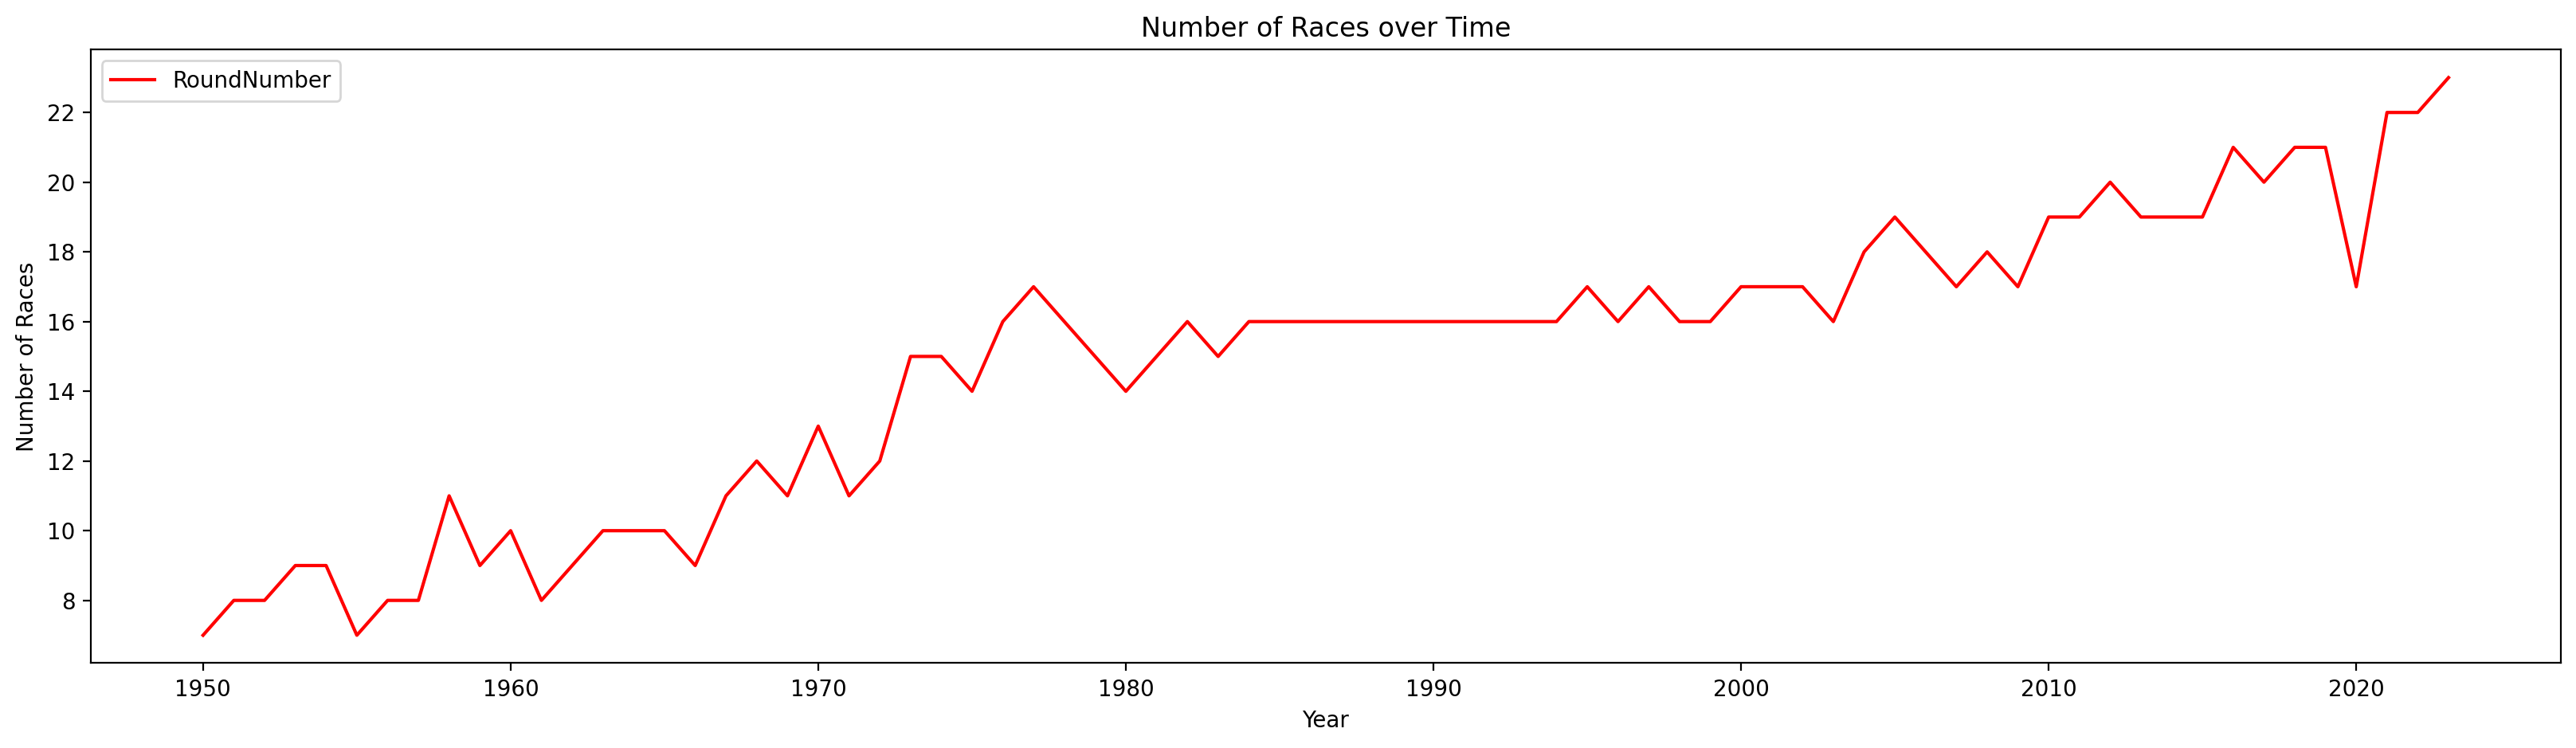

In [4]:
schedule_df["year"] = schedule_df.apply(lambda s: s["Session5Date"].year, axis=1)
df = schedule_df.groupby(["year"]).count()
df = df[["RoundNumber"]]
ax = df.plot.line(y="RoundNumber", use_index=True, color="red", figsize=(20,5))
ax.set_xlabel("Year");
ax.set_ylabel("Number of Races");
ax.set_title("Number of Races over Time");

### Race status over the years

In [5]:
sessions_df = pd.DataFrame()

# Excluding 2023 because season is not complete
for i in range(1950, 2023):
    year = pd.DataFrame()
    for j in range(1,df.loc[float(i)][0]+1):
        session = fastf1.get_session(i, j, 'Race')
        session.load(telemetry=False, laps=False, weather=False)
        year = pd.concat([year, session.results["Status"]])
    status = pd.DataFrame(year[0].value_counts().to_dict(), index=[i])
    del year
    sessions_df = pd.concat([sessions_df, status])
    del status

core           INFO 	Loading data for British Grand Prix - Race [v2.3.1]
core        WARNING 	Session results contain duplicate entries for driver(s) ['10', '9']
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 21 drivers: ['2', '3', '4', '14', '15', '12', '11', '16', '6', '10', '18', '1', '23', '21', '5', '24', '20', '19', '17', '9', '8']
core           INFO 	Loading data for Monaco Grand Prix - Race [v2.3.1]
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 21 drivers: ['34', '40', '48', '42', '50', '26', '6', '38', '14', '2', '32', '36', '16', '10', '52', '12', '24', '44', '8', '28', '4']
core           INFO 	Loading data for Indianapolis 500 - Race [v2.3.1]
core        WARNING 	Session results contain duplicate entries 

In [6]:
sessions_df.head()

,Engine,Finished,+3 Laps,Accident,+2 Laps,+5 Laps,+6 Laps,Gearbox,+1 Lap,Oil pressure,...,Collision damage,Power Unit,ERS,Brake duct,Seat,Damage,Illness,Debris,Undertray,Cooling system
1950,19,17,13.0,12.0,11,9.0,8.0,7.0,6,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,29,29,8.0,9.0,12,1.0,7.0,3.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,20,31,16.0,5.0,10,7.0,8.0,6.0,8,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,27,33,10.0,9.0,8,5.0,4.0,3.0,23,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,30,37,8.0,9.0,9,7.0,7.0,4.0,19,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


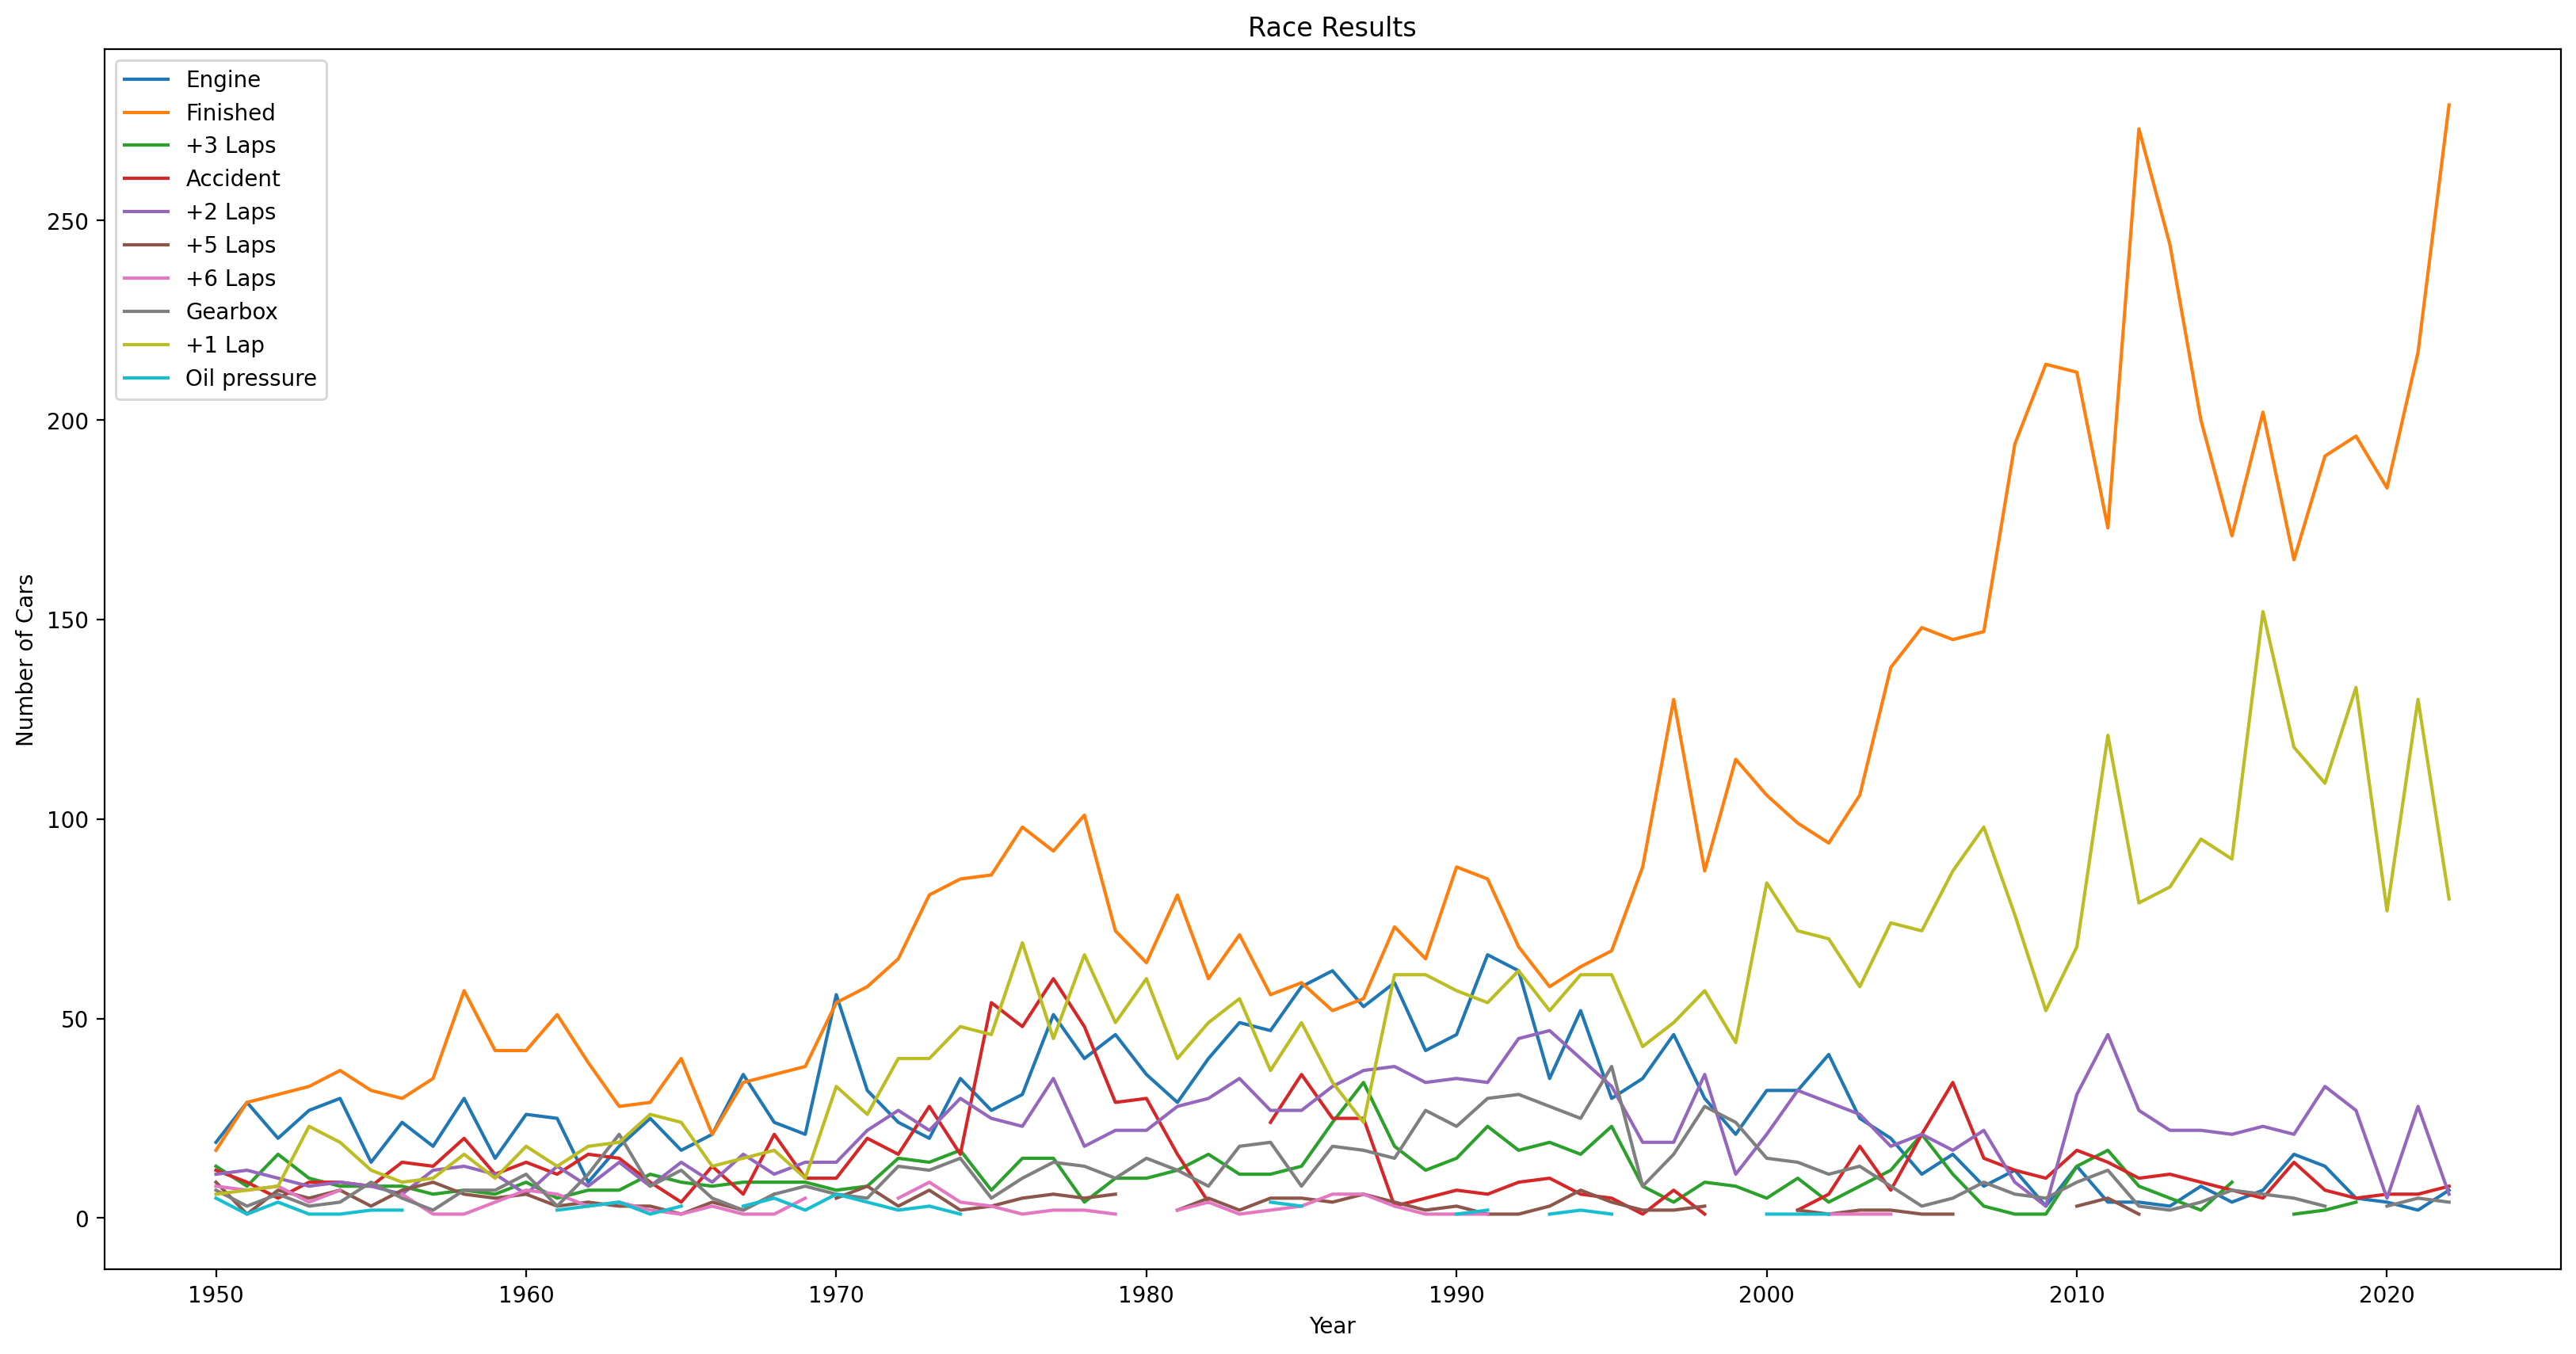

In [7]:
ax = sessions_df.iloc[:,:10].plot.line(use_index=True, figsize=(20,10))
ax.set_xlabel("Year");
ax.set_ylabel("Number of Cars");
ax.set_title("Race Results");

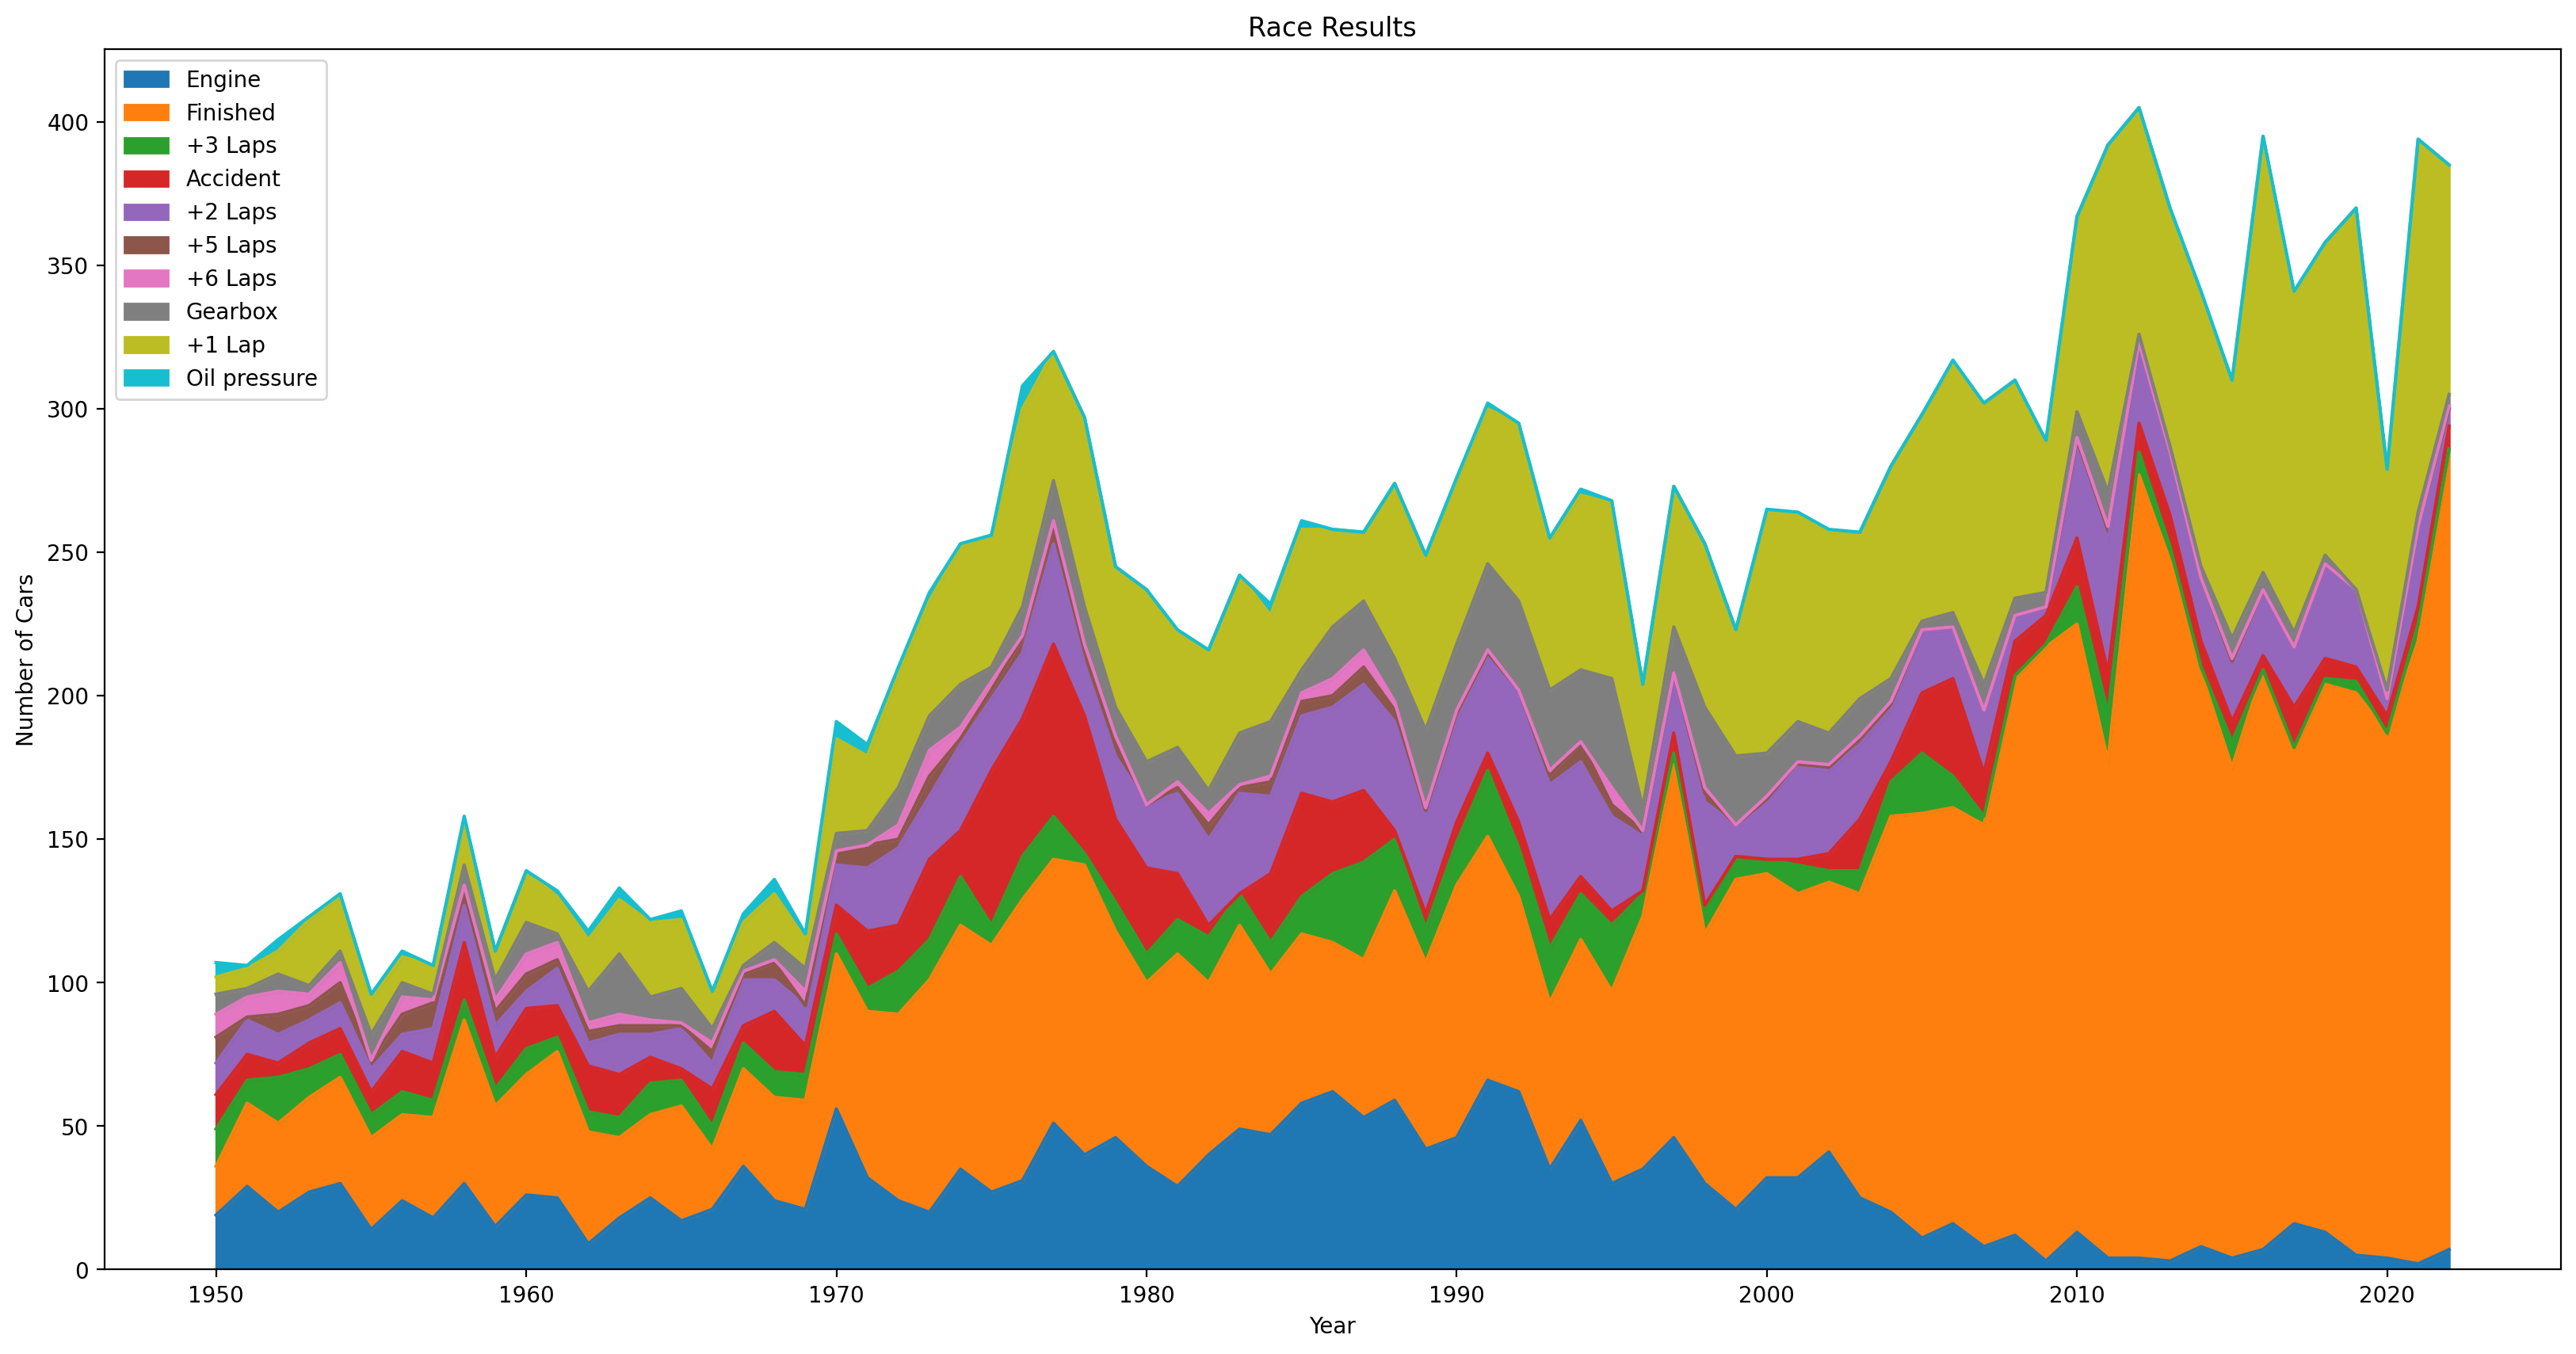

In [8]:
ax = sessions_df.iloc[:,:10].plot.area(use_index=True, figsize=(20,10))
ax.set_xlabel("Year");
ax.set_ylabel("Number of Cars");
ax.set_title("Race Results");

### Race locations

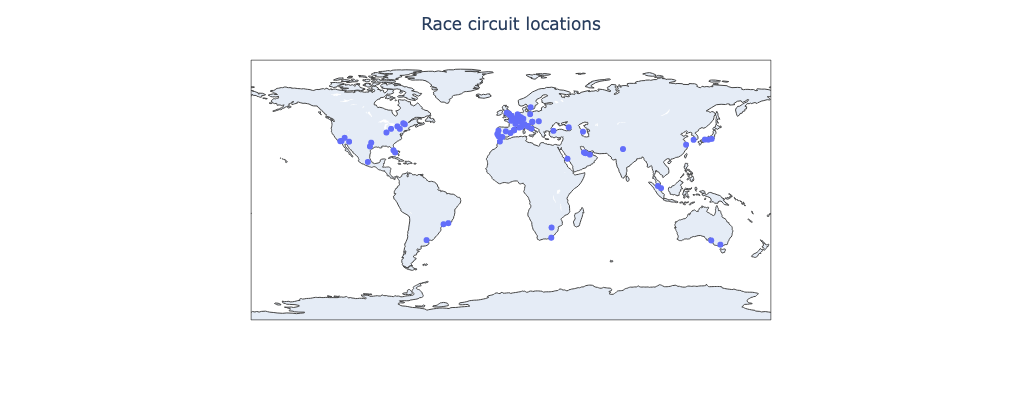

In [59]:
circuits_df = pd.read_csv("./data/circuits.csv")
circuits_df = circuits_df[["name", "location", "country", "lat", "lng"]]
circuits_df["lat"] = circuits_df["lat"].astype(float)
circuits_df["lng"] = circuits_df["lng"].astype(float)
fig = px.scatter_geo(circuits_df, lat="lat", lon="lng", hover_name="location", projection="equirectangular", width=1000, height=400)
fig.update_layout(title='Race circuit locations', title_x=0.5)

### VER vs LEC

In [89]:
def plot_lap(x, y, weekend, year, driver):
    # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(8, 4.75))
    fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=16, y=0.97)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')
    ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)
    lc.set_array(color)
    line = ax.add_collection(lc)
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma, orientation="horizontal")
    plt.show()

In [67]:
session = fastf1.get_session(2022, 2, "RACE")
weekend = session.event
session.load()
ver_lap = session.laps.pick_driver("VER").pick_fastest()
lec_lap = session.laps.pick_driver("LEC").pick_fastest()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 22
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '16', '55', '11', '63', '31', '4', '10', '20', '44', '24', '27', '18', '23', '77', '14', '3', '6', '22']


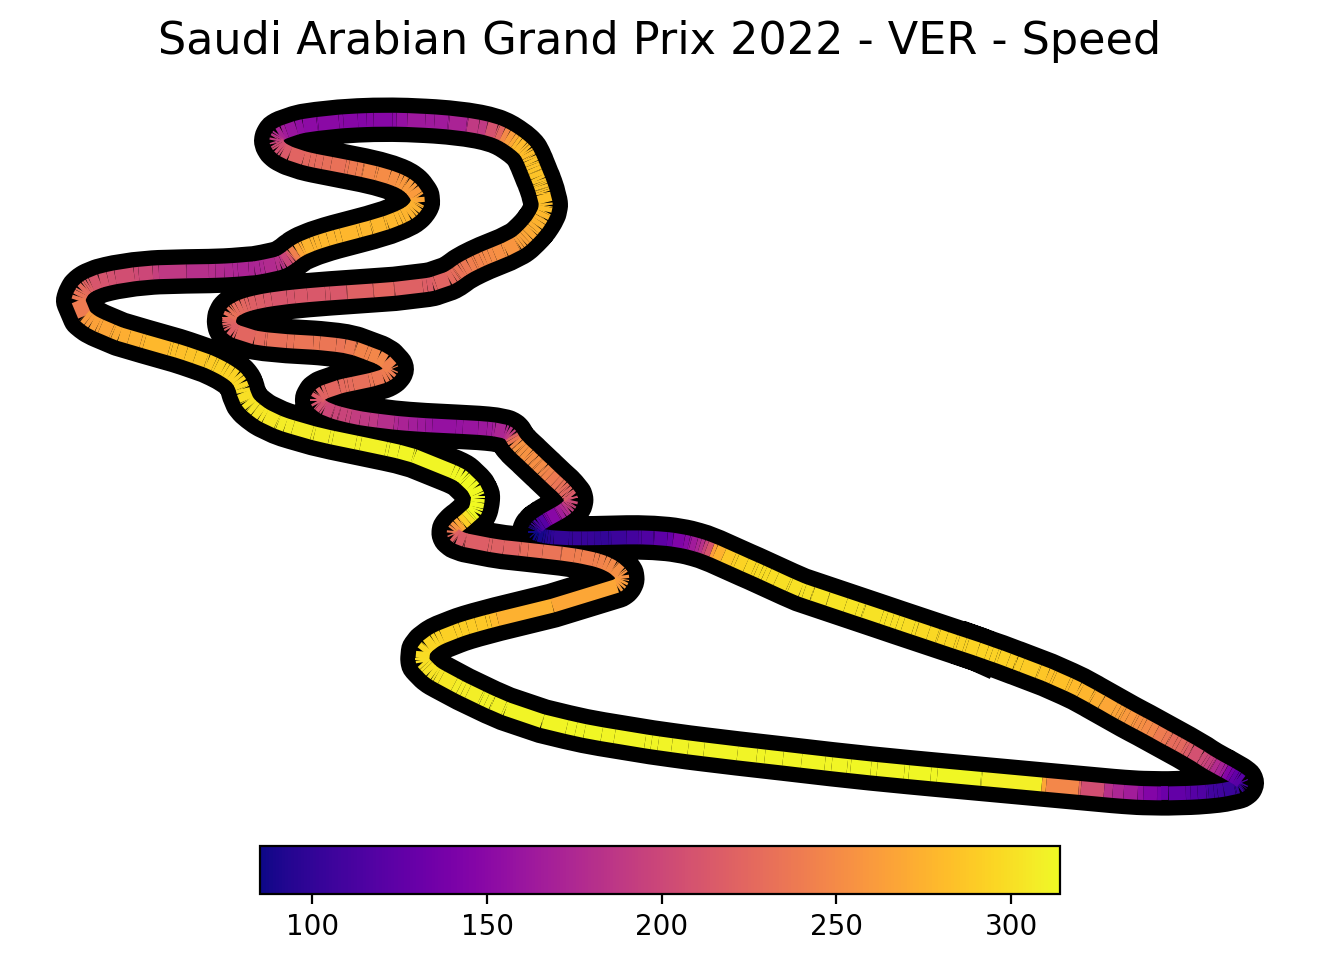

In [90]:
x = ver_lap.telemetry["X"]
y = ver_lap.telemetry["Y"]      
color = ver_lap.telemetry["Speed"]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
plot_lap(x, y, weekend, 2022, "VER")